In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
from scipy import stats
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [4]:
## color blind colors
cc = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

my_colors = {'bb': cc["blue"], 'anc': cc["green"], 'bn50': cc["red"], 'bn5': cc["orange"], 'A00': cc["purple"],
             "M00": cc["pink"], "iso": cc["brown"], "bleach": "#17BECF",
            0: "#C7C7C7", 1: "#7F7F7F", 15: "black"}


## What we learned so far and we can use here:

    - we should exclude the samples that have lower coverage than 35 
    - subsampling to 50 or 100 makes no sense because we loose too many windows and that drops pi in weird ways

In [5]:
# read in data to panda

InPi_default="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_singleData_20240527.pkl"

## ## ## from subsampling
InPi_sub35="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_Overviewsub35_20240530.pkl"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
chromosomes_end = [1.50750e+07, 3.03500e+07, 4.41350e+07, 6.16300e+07, 8.25550e+07, 1.00270e+08, 1.00285e+08]
#files

InCov="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/fromTrimmedReads/Reads_and_Coverage_fromPython.pkl"

## exclude samples below this threshold
cov_thr = 35

In [6]:
## get all the data
overview_all = pd.read_pickle(InPi_default)
df_sub35_all = pd.read_pickle(InPi_sub35)


df_cov=pd.read_pickle(InCov)

df_cov = df_cov.reset_index()
df_cov.rename(columns={'index': 'ID'}, inplace=True)
df_cov = df_cov[["ID","institution","treatment","replicate","week","coverage"]]
df_cov

## merge the data frames
df_mergeoverview_all = pd.merge(overview_all, df_cov, on="ID", how="outer")
df_mergesub35_all = pd.merge(df_sub35_all, df_cov, on="ID", how="outer")
df_mergeoverview_all

,ID,institution_x,treatment_x,inst_treat,week_x,rep,pi_mean,pi_std,piNorm_mean,piNorm_std,piNormwNaN_mean,piNormwNaN_std,NumNaNWindows,institution_y,treatment_y,replicate,week_y,coverage
0,Gent_bb_15_1,Gent,bb,Gent_bb,15.0,1,0.001622,0.003055,0.001593,0.002989,0.001575,0.002956,113.0,Gent,bb,1,15,111.064662
1,Gent_bb_15_2,Gent,bb,Gent_bb,15.0,2,0.001732,0.003177,0.001717,0.003142,0.001714,0.003138,14.0,Gent,bb,2,15,123.782224
2,Gent_bb_15_3,Gent,bb,Gent_bb,15.0,3,0.001737,0.003193,0.001722,0.003157,0.001720,0.003153,12.0,Gent,bb,3,15,103.134254
3,Gent_bb_15_4,Gent,bb,Gent_bb,15.0,4,0.001734,0.003193,0.001719,0.003157,0.001717,0.003153,13.0,Gent,bb,4,15,112.559776
4,Gent_bb_15_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gent,bb,5,15,108.856907
5,Gent_bb_1_1,Gent,bb,Gent_bb,1.0,1,0.001598,0.002997,0.001578,0.002949,0.001564,0.002922,92.0,Gent,bb,1,1,277.081712
6,Gent_bb_1_2,Gent,bb,Gent_bb,1.0,2,0.001703,0.003198,0.001691,0.003168,0.001688,0.003163,16.0,Gent,bb,2,1,150.633462
7,Gent_bb_1_3,Gent,bb,Gent_bb,1.0,3,0.001700,0.003179,0.001686,0.003143,0.001683,0.003137,19.0,Gent,bb,3,1,210.354344
8,Gent_bb_1_4,Gent,bb,Gent_bb,1.0,4,0.001716,0.003191,0.001702,0.003154,0.001698,0.003147,23.0,Gent,bb,4,1,228.824043
9,Gent_iso_15_1,Gent,iso,Gent_iso,15.0,1,0.001707,0.003178,0.001693,0.003140,0.001690,0.003135,16.0,Gent,iso,1,15,138.829437


In [7]:
df_overview_filt = df_mergeoverview_all[df_mergeoverview_all["coverage"]>=cov_thr]
df_sub35_filt = df_mergesub35_all[df_mergesub35_all["coverage"]>=cov_thr]

df_overview_filt

,ID,institution_x,treatment_x,inst_treat,week_x,rep,pi_mean,pi_std,piNorm_mean,piNorm_std,piNormwNaN_mean,piNormwNaN_std,NumNaNWindows,institution_y,treatment_y,replicate,week_y,coverage
0,Gent_bb_15_1,Gent,bb,Gent_bb,15.0,1,0.001622,0.003055,0.001593,0.002989,0.001575,0.002956,113.0,Gent,bb,1,15,111.064662
1,Gent_bb_15_2,Gent,bb,Gent_bb,15.0,2,0.001732,0.003177,0.001717,0.003142,0.001714,0.003138,14.0,Gent,bb,2,15,123.782224
2,Gent_bb_15_3,Gent,bb,Gent_bb,15.0,3,0.001737,0.003193,0.001722,0.003157,0.001720,0.003153,12.0,Gent,bb,3,15,103.134254
3,Gent_bb_15_4,Gent,bb,Gent_bb,15.0,4,0.001734,0.003193,0.001719,0.003157,0.001717,0.003153,13.0,Gent,bb,4,15,112.559776
4,Gent_bb_15_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gent,bb,5,15,108.856907
5,Gent_bb_1_1,Gent,bb,Gent_bb,1.0,1,0.001598,0.002997,0.001578,0.002949,0.001564,0.002922,92.0,Gent,bb,1,1,277.081712
6,Gent_bb_1_2,Gent,bb,Gent_bb,1.0,2,0.001703,0.003198,0.001691,0.003168,0.001688,0.003163,16.0,Gent,bb,2,1,150.633462
7,Gent_bb_1_3,Gent,bb,Gent_bb,1.0,3,0.001700,0.003179,0.001686,0.003143,0.001683,0.003137,19.0,Gent,bb,3,1,210.354344
8,Gent_bb_1_4,Gent,bb,Gent_bb,1.0,4,0.001716,0.003191,0.001702,0.003154,0.001698,0.003147,23.0,Gent,bb,4,1,228.824043
9,Gent_iso_15_1,Gent,iso,Gent_iso,15.0,1,0.001707,0.003178,0.001693,0.003140,0.001690,0.003135,16.0,Gent,iso,1,15,138.829437


In [8]:
# only look at backbone
overviewBB = df_overview_filt.loc[(df_overview_filt['treatment_x']=="bb") | (df_overview_filt['treatment_x']=="anc")]
overviewnotBB = df_overview_filt.loc[(df_overview_filt['treatment_x']!="bb") | (df_overview_filt['treatment_x']=="anc")]
overviewW0 = df_overview_filt.loc[(df_overview_filt['week_x']==0)]
overviewW1 = df_overview_filt.loc[(df_overview_filt['week_x']==1)]
overviewW15 = df_overview_filt.loc[(df_overview_filt['week_x']==15)]

df_sub35BB = df_sub35_filt.loc[(df_sub35_filt['treatment_x']=="bb") | (df_sub35_filt['treatment_x']=="anc")]
df_sub35notBB = df_sub35_filt.loc[(df_sub35_filt['treatment_x']!="bb") | (df_sub35_filt['treatment_x']=="anc")]
df_sub35W0 = df_sub35_filt.loc[(df_sub35_filt['week_x']==0)]
df_sub35W1 = df_sub35_filt.loc[(df_sub35_filt['week_x']==1)]
df_sub35W15 = df_sub35_filt.loc[(df_sub35_filt['week_x']==15)]

overviewW1

,ID,institution_x,treatment_x,inst_treat,week_x,rep,pi_mean,pi_std,piNorm_mean,piNorm_std,piNormwNaN_mean,piNormwNaN_std,NumNaNWindows,institution_y,treatment_y,replicate,week_y,coverage
5,Gent_bb_1_1,Gent,bb,Gent_bb,1.0,1,0.001598,0.002997,0.001578,0.002949,0.001564,0.002922,92.0,Gent,bb,1,1,277.081712
6,Gent_bb_1_2,Gent,bb,Gent_bb,1.0,2,0.001703,0.003198,0.001691,0.003168,0.001688,0.003163,16.0,Gent,bb,2,1,150.633462
7,Gent_bb_1_3,Gent,bb,Gent_bb,1.0,3,0.001700,0.003179,0.001686,0.003143,0.001683,0.003137,19.0,Gent,bb,3,1,210.354344
8,Gent_bb_1_4,Gent,bb,Gent_bb,1.0,4,0.001716,0.003191,0.001702,0.003154,0.001698,0.003147,23.0,Gent,bb,4,1,228.824043
18,NIOO_A00_1_1,NIOO,A00,NIOO_A00,1.0,1,0.001700,0.003191,0.001679,0.003142,0.001677,0.003138,12.0,NIOO,A00,1,1,72.269429
19,NIOO_A00_1_2,NIOO,A00,NIOO_A00,1.0,2,0.001695,0.003185,0.001667,0.003126,0.001664,0.003120,18.0,NIOO,A00,2,1,72.295709
20,NIOO_A00_1_3,NIOO,A00,NIOO_A00,1.0,3,0.001668,0.003143,0.001637,0.003074,0.001634,0.003068,19.0,NIOO,A00,3,1,71.109179
22,NIOO_A00_1_5,NIOO,A00,NIOO_A00,1.0,5,0.001681,0.003211,0.001639,0.003114,0.001634,0.003105,27.0,NIOO,A00,5,1,54.305094
34,NIOO_bb_1_1,NIOO,bb,NIOO_bb,1.0,1,0.001710,0.003281,0.001693,0.003228,0.001690,0.003222,18.0,NIOO,bb,1,1,86.002280
35,NIOO_bb_1_3,NIOO,bb,NIOO_bb,1.0,3,0.001672,0.003151,0.001656,0.003114,0.001653,0.003110,15.0,NIOO,bb,3,1,117.662610


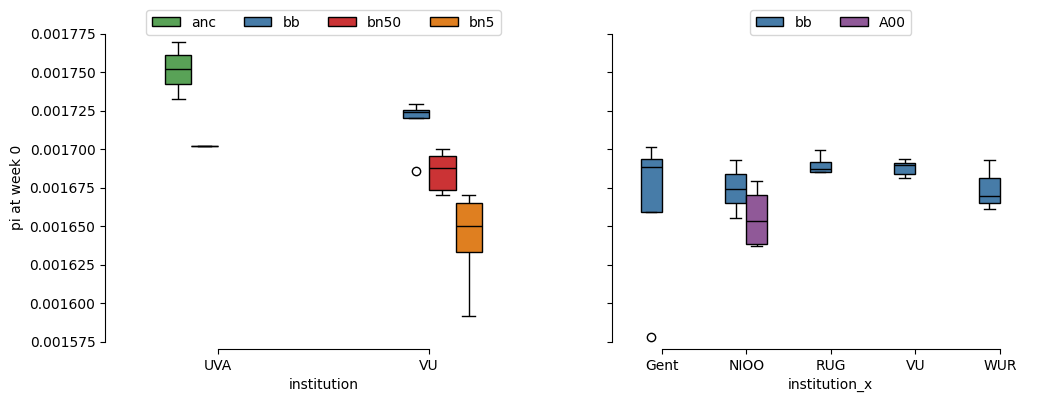

In [9]:
## hypothesis: different treatments start out with different diversity from the start:


fig1, ax1 = plt.subplots(1,2,figsize=(12,4), sharey=True)

sns.boxplot(data=overviewW0, x="institution_x", y="piNorm_mean", hue="treatment_x", width=0.5, ax=ax1[0], palette =my_colors)
sns.boxplot(data=overviewW1, x="institution_x", y="piNorm_mean", hue="treatment_x", width=0.5, ax=ax1[1], palette=my_colors)

ax1[0].set_ylabel("pi at week 0")
ax1[1].set_ylabel("pi at week 1")
ax1[0].set_xlabel("institution")
ax1[0].set_ylim([0.001575,0.001775])
ax1[1].set_ylim([0.001575,0.001775])

sns.move_legend(ax1[0], "upper center", ncol=4, bbox_to_anchor=(0.5, 1.1))
sns.move_legend(ax1[1], "upper center", ncol=4, bbox_to_anchor=(0.5, 1.1))

ax1[0].legend_.set_title(None)
ax1[1].legend_.set_title(None)
sns.despine(offset=5, trim=True)
fig1.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_plots/Pi_week0AND1_Coloredtreatments", 
             dpi=300, bbox_inches='tight')

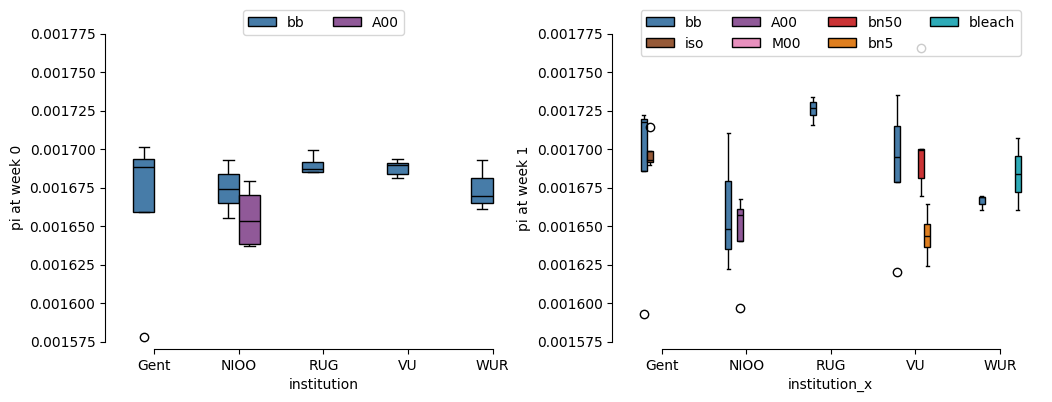

In [10]:
## hypothesis: different treatments start out with different diversity from the start:

fig2, ax2 = plt.subplots(1,2,figsize=(12,4))


sns.boxplot(data=overviewW1, x="institution_x", y="piNorm_mean", hue="treatment_x", width=0.5, ax=ax2[0], palette =my_colors)
sns.boxplot(data=overviewW15, x="institution_x", y="piNorm_mean", hue="treatment_x", width=0.5, ax=ax2[1], palette=my_colors)

ax2[0].set_ylabel("pi at week 0")
ax2[1].set_ylabel("pi at week 1")
ax2[0].set_xlabel("institution")
ax2[0].set_ylim([0.001575,0.001775])
ax2[1].set_ylim([0.001575,0.001775])

sns.move_legend(ax2[0], "upper center", ncol=4, bbox_to_anchor=(0.5, 1.1))
sns.move_legend(ax2[1], "upper center", ncol=4, bbox_to_anchor=(0.5, 1.1))

ax2[0].legend_.set_title(None)
ax2[1].legend_.set_title(None)
sns.despine(offset=5, trim=True)
#fig1.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_plots/Pi_week0AND1_Coloredtreatments", 
#             dpi=300, bbox_inches='tight')

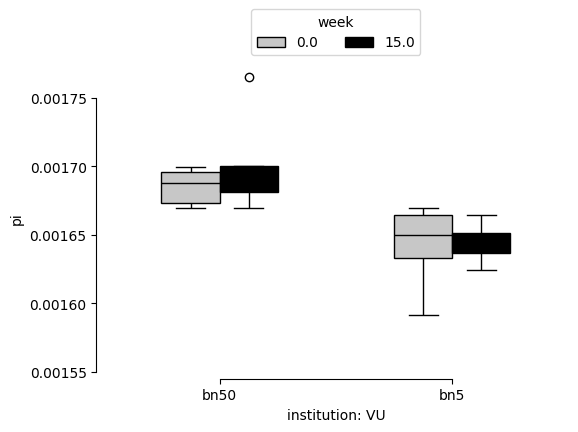

In [21]:
## hypothesis: diversity goes down over time ... or does it?

fig3, ax3 = plt.subplots(figsize=(6,4))
ax3 = sns.boxplot(data=df_overview_filt[(df_overview_filt["institution_x"]=="VU") & (df_overview_filt["treatment_x"]!="bb")].sort_index(), 
                  x="treatment_x", y="piNorm_mean", hue="week_x", palette=my_colors, width=0.5)
sns.move_legend(ax3, "upper center", bbox_to_anchor=(0.5, 1.2), ncol=3)

ax3.set_ylabel("pi")
ax3.set_xlabel("institution: VU")
ax3.set_ylim([0.00155,0.001775])

ax3.legend_.set_title(title="week")
sns.despine(offset=5, trim=True)

fig3.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_plots/Pi_week1AND15_VU_bn5_bn50.png", 
             dpi=300, bbox_inches='tight')

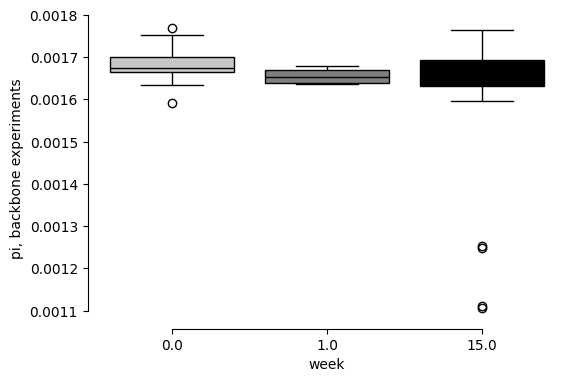

In [19]:
## hypothesis: different treatments have different diversity at the end of evolution

fig7, ax7 = plt.subplots(figsize=(6,4))
ax7 = sns.boxplot(data=overviewnotBB, x="week_x", y="piNorm_mean", hue="week_x", palette=my_colors)
#sns.move_legend(ax7, "upper center", bbox_to_anchor=(0.5, 1.2), ncol=3)
sns.despine(trim=True)
ax7.get_legend().set_visible(False)
#ax7.legend_.set_title(title="week")
sns.despine(offset=5, trim=True)
#ax7.set_ylim([0.0015,0.0018])

ax7.set_ylabel("pi, backbone experiments")
ax7.set_xlabel("week")
fig7.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_plots/Pi_bb_compareWeeks.png", 
             dpi=300, bbox_inches='tight')

NameError: name 'f1' is not defined

In [14]:
# Perform two-sample t-test
bb_anc_w0 = df_overview_filt[(df_overview_filt["week_x"]==0) & (df_overview_filt["treatment_x"]!="bn50") & ((df_overview_filt["treatment_x"]!="bn5"))]

bb_w1 = df_overview_filt[(df_overview_filt["week_x"]==1) & (df_overview_filt["treatment_x"]=="bb")]

bb_w15 = df_overview_filt[(df_overview_filt["week_x"]==15) & (df_overview_filt["treatment_x"]=="bb")]



In [17]:

t_stat, p_value = stats.ttest_ind(bb_anc_w0["piNorm_mean"].values, bb_w1["piNorm_mean"].values,equal_var= False)
print("T statistic:", t_stat)
print("P-value:", p_value)

# Setting significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.")

T statistic: 4.505280491645398
P-value: 0.00027022229938555067
Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.
